In [1]:
import pretty_midi
import numpy as np
# For plotting
import mir_eval.display
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline
# For putting audio in the notebook
import IPython.display
import copy


In [2]:
def plot_piano_roll(pm, start_pitch, end_pitch, fs=100):
    # Use librosa's specshow function for displaying the piano roll
    librosa.display.specshow(pm.get_piano_roll(fs)[start_pitch:end_pitch],
                             hop_length=1, sr=fs, x_axis='time', y_axis='cqt_note',
                             fmin=pretty_midi.note_number_to_hz(start_pitch))

## Load the midi file and see its piano roll
The white lines reperesent the downbeats, which are the first beat in bars.

/home/jeremyfeng/.virtualenvs/tensorflow/lib/python3.5/site-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  RuntimeWarning)


midi file length: 233.98923657291664
number of downbeats (bars): 130


(25, 45)

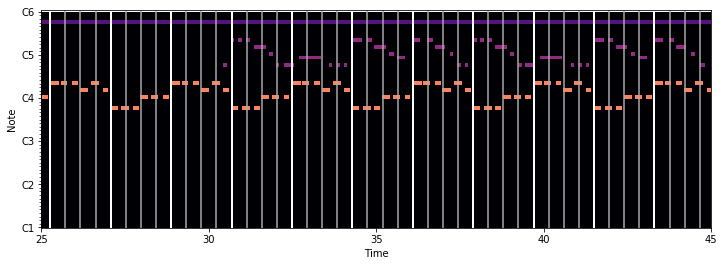

In [3]:
DATASET_BASE_DIR = '../Few-Shot-Music-Generation/raw-data/freemidi/freemidi_data/'
filepath = DATASET_BASE_DIR + '2 Unlimited/dowhatsgoodforme.mid'
# Load the midi file
pm_src = pretty_midi.PrettyMIDI(filepath)

db = pm_src.get_downbeats()
b = pm_src.get_beats()
nb_db = len(db)
pm_slice_list = []


print('midi file length: {}'.format(pm_src.get_end_time()))
print('number of downbeats (bars): {}'.format(nb_db))

# Plot piano roll
plt.figure(figsize=(12, 4))
plot_piano_roll(pm_src, 24, 84)
ymin, ymax = plt.ylim()
# Plot downbeats as white lines, beats as grey lines
mir_eval.display.events(b, base=ymin, height=ymax, color='#AAAAAA')
mir_eval.display.events(db, base=ymin, height=ymax, color='#FFFFFF', lw=2)
# Only display 20 seconds for clarity
plt.xlim(25, 45)

# fs = 16000
# IPython.display.Audio(pm_src.synthesize(fs=16000), rate=16000)
# # Sounds like sine waves...


## Slice the midi file 
The midi file has been stored in the `prettyMIDI` object as a whole. In this step, we slice it into a list of `prettyMIDI` objects, each of which contains a 2-bar segment.

In [4]:
for i in range(2,nb_db,2):
    pm_tmp = copy.deepcopy(pm_src)
    # print(pm_src.get_end_time())
    pm_tmp.adjust_times([db[i-2], db[i]], [0, db[i] - db[i-2]])
    print('Slice #{}, from {} to {}, length:{}.'.format(int(i/2),db[i-2],db[i], pm_tmp.get_end_time()))
    pm_slice_list.append(pm_tmp)


print(len(pm_slice_list))

Slice #1, from 0.0 to 3.609016, length:3.5338281666666664.
Slice #2, from 3.609016 to 7.218031999999997, length:3.5291289270833333.
Slice #3, from 7.218031999999997 to 10.827047999999994, length:3.5385274062500027.
Slice #4, from 10.827047999999994 to 14.436063999999991, length:3.5338281666666713.
Slice #5, from 14.436063999999991 to 18.045079999999988, length:3.557324364583341.
Slice #6, from 18.045079999999988 to 21.654095999999985, length:3.5573243645833443.
Slice #7, from 21.654095999999985 to 25.263111999999982, length:3.557324364583348.
Slice #8, from 25.263111999999982 to 28.87212799999998, length:3.5573243645833514.
Slice #9, from 28.87212799999998 to 32.48114399999998, length:3.557324364583355.
Slice #10, from 32.48114399999998 to 36.090159999999976, length:3.5573243645833514.
Slice #11, from 36.090159999999976 to 39.69917599999997, length:3.585519802083354.
Slice #12, from 39.69917599999997 to 43.30819199999997, length:3.5573243645833585.
Slice #13, from 43.30819199999997 to 

## Randomly select a slice to listen to

In [8]:
fs = 16000
rand_slice_idx = np.random.randint(np.floor(nb_db/2))
print('Slice #{} sounds like...'.format(rand_slice_idx))
IPython.display.Audio(pm_slice_list[rand_slice_idx].synthesize(fs=16000), rate=16000)

# Sounds like sine waves...

Slice #47 sounds like...
